In [99]:
import warnings
warnings.filterwarnings("ignore")

In [94]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
source_file = "../data/ravenpack/dj_global_macro_20000101_20191031_ess.csv"

In [5]:
with open(source_file, "r", encoding="ISO-8859-1") as file:
    df = pd.read_csv(file, header=0)

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


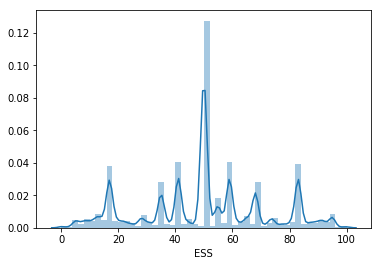

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


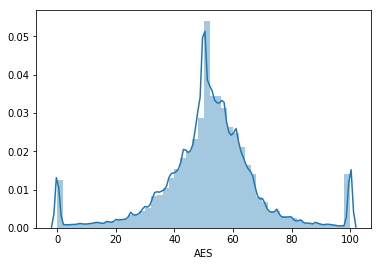

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


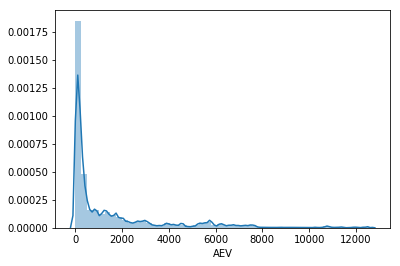

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


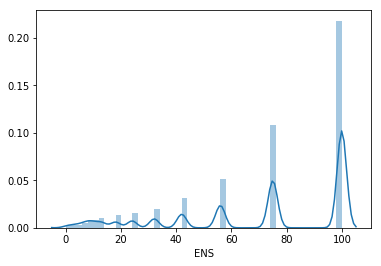

In [7]:
for col in ["ESS", "AES", "AEV", "ENS"]:
    sns.distplot(df[col])
    plt.show()

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


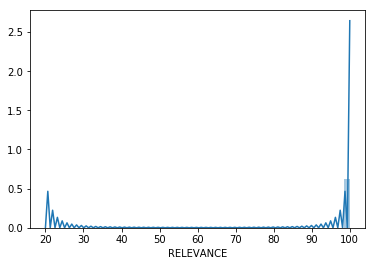

In [58]:
sns.distplot(df.RELEVANCE)

In [40]:
print(df.columns)
print(df.shape)

Index(['TIMESTAMP_UTC', 'RPNA_DATE_UTC', 'RPNA_TIME_UTC', 'RP_ENTITY_ID',
       'ENTITY_TYPE', 'ENTITY_NAME', 'POSITION_NAME', 'RP_POSITION_ID',
       'COUNTRY_CODE', 'RELEVANCE', 'TOPIC', 'GROUP', 'TYPE', 'SUB_TYPE',
       'PROPERTY', 'EVALUATION_METHOD', 'MATURITY', 'CATEGORY', 'ESS', 'AES',
       'AEV', 'ENS', 'ENS_SIMILARITY_GAP', 'ENS_KEY', 'ENS_ELAPSED', 'G_ENS',
       'G_ENS_SIMILARITY_GAP', 'G_ENS_KEY', 'G_ENS_ELAPSED',
       'EVENT_SIMILARITY_KEY', 'NEWS_TYPE', 'SOURCE', 'RP_STORY_ID',
       'RP_STORY_EVENT_INDEX', 'RP_STORY_EVENT_COUNT', 'PRODUCT_KEY'],
      dtype='object')
(2764266, 36)


In [45]:
set(df.ENTITY_TYPE)

{'CMDT', 'COMP', 'CURR', 'ORGA', 'PLCE'}

In [48]:
(df[df.ENTITY_TYPE == "CMDT"].ENTITY_NAME).shape

(406523,)

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(106960, 36)

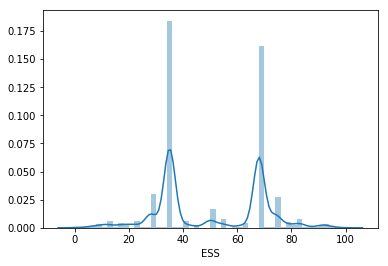

In [54]:
sns.distplot(df[df.ENTITY_NAME == "Crude Oil"].ESS)
df[df.ENTITY_NAME == "Crude Oil"].shape

In [146]:
df_oil = df[df.ENTITY_NAME == "Crude Oil"]
df_oil.head()

,TIMESTAMP_UTC,RPNA_DATE_UTC,RPNA_TIME_UTC,RP_ENTITY_ID,ENTITY_TYPE,ENTITY_NAME,POSITION_NAME,RP_POSITION_ID,COUNTRY_CODE,RELEVANCE,...,G_ENS_SIMILARITY_GAP,G_ENS_KEY,G_ENS_ELAPSED,EVENT_SIMILARITY_KEY,NEWS_TYPE,SOURCE,RP_STORY_ID,RP_STORY_EVENT_INDEX,RP_STORY_EVENT_COUNT,PRODUCT_KEY
16,2000-01-01 10:08:00.000,20000101,10:08:00.000,FD9CFE,CMDT,Crude Oil,NaN,NaN,XX,100,...,0.00000,765AA7AB5BF56293D1849B82B14533BB,0,4E59863BBB2CB48F58809D319047702A,NEWS-FLASH,B5569E,3F3083D8BBC9731C0F37EBA7F1AB3192,2,2,DJ-GM
17,2000-01-01 10:08:00.000,20000101,10:08:00.000,FD9CFE,CMDT,Crude Oil,NaN,NaN,XX,100,...,0.00000,765AA7AB5BF56293D1849B82B14533BB,0,4E59863BBB2CB48F58809D319047702A,NEWS-FLASH,B5569E,765AA7AB5BF56293D1849B82B14533BB,2,2,DJ-GM
69,2000-01-03 07:00:00.000,20000103,07:00:00.000,FD9CFE,CMDT,Crude Oil,NaN,NaN,XX,100,...,5.02083,183E1A9B074070F5E794483D4DFE66FA,0,6A5CE8F078AA1954083E870CA70828F9,FULL-ARTICLE,18A55F,183E1A9B074070F5E794483D4DFE66FA,1,1,DJ-GM
171,2000-01-04 05:00:00.000,20000104,05:00:00.000,FD9CFE,CMDT,Crude Oil,NaN,NaN,XX,100,...,0.91667,183E1A9B074070F5E794483D4DFE66FA,79200000,6A5CE8F078AA1954083E870CA70828F9,FULL-ARTICLE,18A55F,C16D093C381A7FF580D438CF66F41779,1,1,DJ-GM
172,2000-01-04 07:46:00.000,20000104,07:46:00.000,FD9CFE,CMDT,Crude Oil,NaN,NaN,XX,100,...,42.19375,637F73A1EEB28EFDA918BA130E4BE237,0,510BBC6D3AF663EFB6A0B84717A44ED3,NEWS-FLASH,B5569E,637F73A1EEB28EFDA918BA130E4BE237,1,1,DJ-GM


## Now up-sample to daily level.

In [138]:
daily_mean_ess = pd.DataFrame(df_oil.groupby("RPNA_DATE_UTC").mean()["ESS"])
daily_sum_ess = pd.DataFrame(df_oil.groupby("RPNA_DATE_UTC").sum()["ESS"])
daily_size = pd.DataFrame(df_oil.groupby("RPNA_DATE_UTC").size())

daily = pd.concat([daily_mean_ess, daily_sum_ess, daily_size], axis=1)
daily.columns = ["MEAN_ESS", "TOTAL_ESS", "COUNTS"]

In [139]:
daily_idx=pd.to_datetime(daily_mean_ess.index, format="%Y%m%d")
daily.index = daily_idx
daily.head()

,MEAN_ESS,TOTAL_ESS,COUNTS
RPNA_DATE_UTC,,,
2000-01-01,50.0,100,2
2000-01-03,68.0,68,1
2000-01-04,60.5,363,6
2000-01-05,35.0,35,1
2000-01-06,41.0,123,3


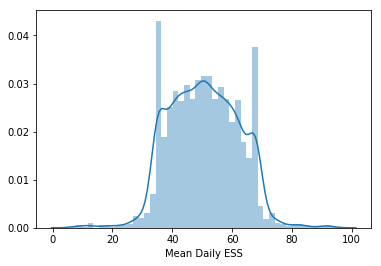

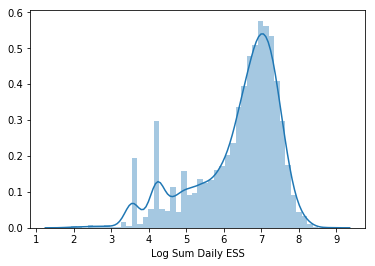

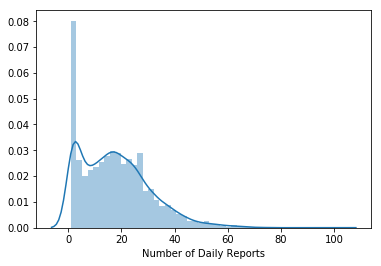

In [145]:
sns.distplot(daily.MEAN_ESS, axlabel="Mean Daily ESS")
plt.show()
sns.distplot(np.log(daily.TOTAL_ESS), axlabel="Log Sum Daily ESS")
plt.show()
sns.distplot(daily.COUNTS, axlabel="Number of Daily Reports")

23